In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('max_rows', 100)

In [2]:
companies = pd.read_csv('data/companies.tsv', sep='\t')
companies.head()

,companiesId,companiesName,companiesDateCreated,createdBy,companiesEmails,companiesPhones,employeesId,employeesName,usersResponsible,sectorKey
0,1,Class LLP,4/13/2019,johndoe,malesuada.vel@purus.edu,(56) 1742-4158,1,Damian Mathews,maryann,5
1,2,Vulputate Corporation,2/21/2019,johndoe,ut.erat.Sed@metusurna.net,(31) 8344-8808,2,Paul Leblanc,carlossuarez,3
2,3,Sed Dui Fusce Consulting,6/29/2017,johndoe,lacus.Aliquam@Proindolor.ca,(22) 6539-2114,3,Thomas Finléy,elisadoe,6
3,4,Orci Donec Nibh Incorporated,6/24/2017,johndoe,in@Sedeunibh.edu,(59) 9922-2903,4,Kelly Hamilton,joerobertson,3
4,5,Sagittis Nullam Vitae Ltd,8/6/2018,johndoe,pharetra@SuspendisseeleifendCras.org,(47) 2627-1232,5,Yoshio Prince,maryann,2


In [21]:
deals = pd.read_csv('data/deals.tsv', sep='\t', index_col='dealsDateCreated', parse_dates=True)
deals.head()

,dealsId,dealsPrice,contactsId,companiesId
dealsDateCreated,,,,
2018-02-28,9,2630,57,57
2018-09-08,10,8880,11,29
2018-04-05,18,3930,30,30
2018-06-13,23,2300,32,32
2018-01-01,24,3480,15,19


In [86]:
sold_total = deals.resample('MS').sum()
sold_total['month'] = sold_total.index
sold_total['month'] = sold_total['month'].dt.strftime('%b/%y')
sold_total

,dealsId,dealsPrice,contactsId,companiesId,month
dealsDateCreated,,,,,
2017-09-01,92,31390,206,207,Sep/17
2017-10-01,201,22230,165,197,Oct/17
2017-11-01,242,14430,123,187,Nov/17
2017-12-01,149,7210,105,105,Dec/17
2018-01-01,123,5800,109,113,Jan/18
2018-02-01,378,31380,345,349,Feb/18
2018-03-01,147,10020,73,73,Mar/18
2018-04-01,159,10690,57,57,Apr/18
2018-05-01,209,51240,175,183,May/18


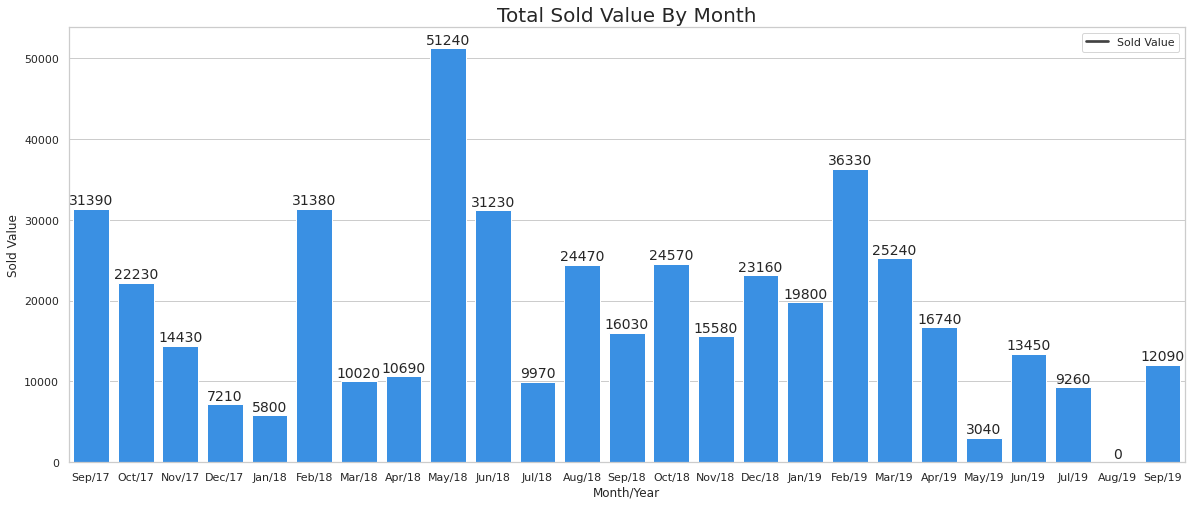

In [85]:
sns.set(style='whitegrid', rc={'figure.figsize':(20,8)})
bar_plot = sns.barplot(x='month', y='dealsPrice', data=sold_total, color='dodgerblue')

bar_plot.legend(['Sold Value'])
bar_plot.set_title('Total Sold Value By Month', fontsize=20)
bar_plot.set(xlabel='Month/Year',ylabel='Sold Value')

for i, bar in enumerate(bar_plot.patches):
    h = bar.get_height()
    bar_plot.text(
        i, # bar index (x coordinate of text)
        h+1000, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        size=14)

In [18]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dealsId           100 non-null    int64         
 1   dealsDateCreated  100 non-null    datetime64[ns]
 2   dealsPrice        100 non-null    int64         
 3   contactsId        100 non-null    int64         
 4   companiesId       100 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.0 KB


In [7]:
contacts = pd.read_csv('data/contacts.tsv', sep='\t')
contacts.head()

,contactsId,contactsName,contactsDateCreated,contactsCreatedBy,contactsEmails,contactsPhones,contactsEmployers,employersId,contactsHomeAdress,contactsLatLong,contactsRelatedToLead,contactsResponsible
0,1,Damian Mathews,4/13/2019,johndoe,malesuada.vel@purus.edu,(56) 1742-4158,Class LLP,1,Ap #554-5077 Nunc Ave,"-29.55083, -95.44015",186,maryann
1,2,Paul Leblanc,2/21/2019,johndoe,ut.erat.Sed@metusurna.net,(31) 8344-8808,Vulputate Corporation,2,"P.O. Box 505, 3155 Dolor Av.","74.11207, 40.27304",86,carlossuarez
2,3,Thomas Finléy,6/29/2017,johndoe,lacus.Aliquam@Proindolor.ca,(22) 6539-2114,Sed Dui Fusce Consulting,3,209-1631 Velit. Ave,"79.42883, -110.04649",26,elisadoe
3,4,Kelly Hamilton,6/24/2017,johndoe,in@Sedeunibh.edu,(59) 9922-2903,Orci Donec Nibh Incorporated,4,"Ap #195-7212 Id, Rd.","-36.76197, 167.84722",61,joerobertson
4,5,Yoshio Prince,8/6/2018,johndoe,pharetra@SuspendisseeleifendCras.org,(47) 2627-1232,Sagittis Nullam Vitae Ltd,5,7919 Sit St.,"55.7959, 106.64754",52,maryann


In [8]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0    contactsId            74 non-null     int64 
 1   contactsName           74 non-null     object
 2   contactsDateCreated    74 non-null     object
 3   contactsCreatedBy      74 non-null     object
 4   contactsEmails         74 non-null     object
 5   contactsPhones         74 non-null     object
 6   contactsEmployers      74 non-null     object
 7   employersId            74 non-null     int64 
 8   contactsHomeAdress     74 non-null     object
 9   contactsLatLong        74 non-null     object
 10  contactsRelatedToLead  74 non-null     int64 
 11  contactsResponsible    74 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.1+ KB


In [9]:
sectors = pd.read_csv('data/sectors.tsv', sep='\t')
sectors.head()

,sectorKey,sector
0,1,Bens de Consumo
1,2,Serviços
2,3,Tecnologia
3,4,Indústria
4,5,Varejo


In [10]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sectorKey  6 non-null      int64 
 1   sector     6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [15]:
companies

,companiesId,companiesName,companiesDateCreated,createdBy,companiesEmails,companiesPhones,employeesId,employeesName,usersResponsible,sectorKey
0,1,Class LLP,4/13/2019,johndoe,malesuada.vel@purus.edu,(56) 1742-4158,1,Damian Mathews,maryann,5
1,2,Vulputate Corporation,2/21/2019,johndoe,ut.erat.Sed@metusurna.net,(31) 8344-8808,2,Paul Leblanc,carlossuarez,3
2,3,Sed Dui Fusce Consulting,6/29/2017,johndoe,lacus.Aliquam@Proindolor.ca,(22) 6539-2114,3,Thomas Finléy,elisadoe,6
3,4,Orci Donec Nibh Incorporated,6/24/2017,johndoe,in@Sedeunibh.edu,(59) 9922-2903,4,Kelly Hamilton,joerobertson,3
4,5,Sagittis Nullam Vitae Ltd,8/6/2018,johndoe,pharetra@SuspendisseeleifendCras.org,(47) 2627-1232,5,Yoshio Prince,maryann,2
5,6,Lectus LLP,10/31/2018,johndoe,Nunc.sed@duiCum.net,(40) 9097-1880,6,Ignatius Buck,carlossuarez,6
6,7,Suspendisse Ac LLP,9/5/2017,johndoe,tellus@velvenenatisvel.ca,(75) 2366-6489,7,Anthony Bernard,elisadoe,2
7,8,Auctor Odio A Company,11/23/2018,johndoe,erat@Suspendisse.co.uk,(49) 4738-0037,8,Connor Faulkneré,joerobertson,5
8,9,Sagittis Lobortis Company,10/31/2017,johndoe,fringilla.Donec.feugiat@velit.co.uk,(87) 3407-9858,9,Ira Harvey,maryann,4
9,10,Ante Ltd,8/22/2019,johndoe,Aenean@Curabitur.co.uk,(66) 9905-5683,10,Dane Carroll,carlossuarez,3
